Credit card fraud detection is a set of activities that are taken to prevent money via credit card transactions. Credit card fraud loses consumers and financial companies billions of dollars annually. In most companies, fraud is identified after it occurs, In the event that they are unable to prevent it in a timely fashion. Thus, fraud detection systems have become essential for banks and financial institutions to avoid losses.

In [1]:
# importing libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
print('Python:{}'.format(sys.version))
print('numpy:{}'.format(np.__version__))

C:\Users\pritam\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Python:3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
numpy:1.19.2


In [2]:
# reading data sets using pandas
df=pd.read_csv(r'C:\Users\pritam\Desktop\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# checking the columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
# checking data shape
df.shape

(284807, 31)

In [5]:
# checking missing values
df.isnull().any().sum()

0

In [6]:
# description of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


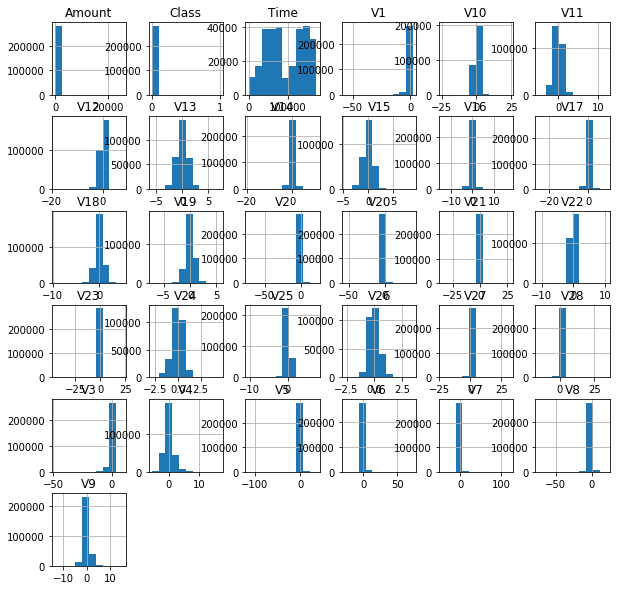

In [7]:
# Let's see the structure of the data plotting hsitogram.
df.hist(figsize=(10,10))
plt.show()

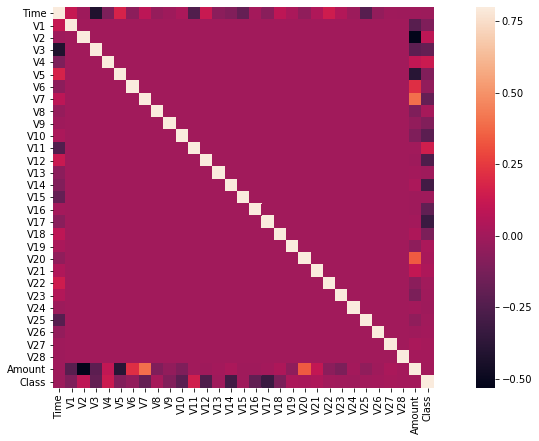

In [8]:
# let's see correlation between variables
corrmat=df.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(corrmat,vmax=.8,square=True)

In [9]:
# Checking the numerical summary of the future working data
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


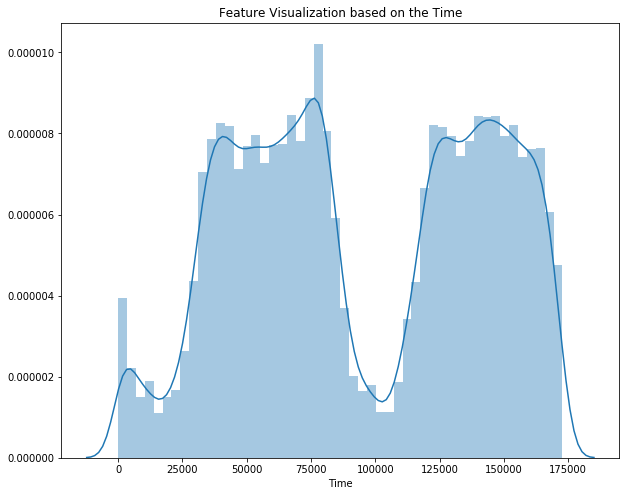

In [10]:
# Distplot of Time
plt.figure(figsize=(10,8))
plt.title('Feature Visualization based on the Time')
sns.distplot(df.Time)

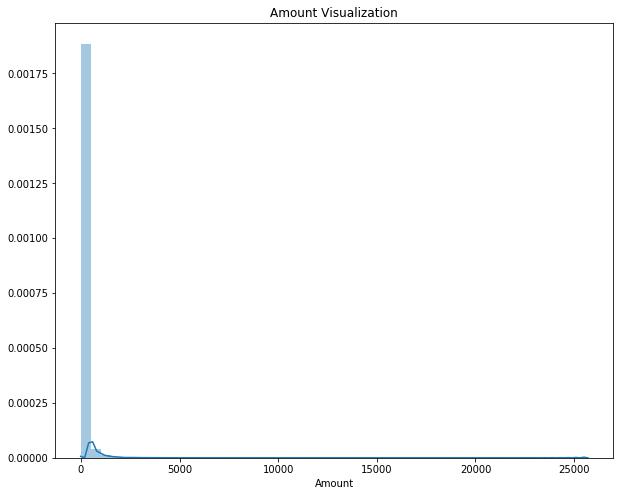

In [11]:
# Distplot of amount
plt.figure(figsize=(10,8))
plt.title('Amount Visualization')
sns.distplot(df.Amount)

0    284315
1       492
Name: Class, dtype: int64
284315
492


Text(0.5, 0, 'Class (Non-Fraudulent:0, Fraudulent:1)')

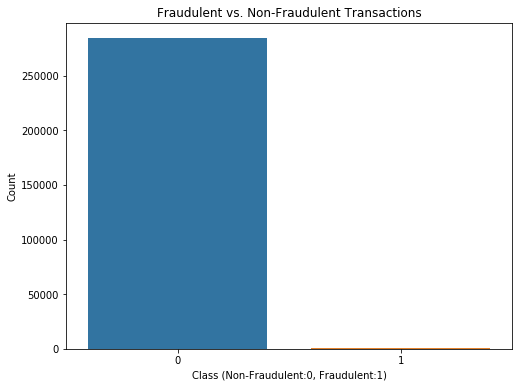

In [12]:
# Lets see the nature of the fraudulant and non-fraudulant transactions.
counts=df['Class'].value_counts()
print(counts)
non_fraudulannt_value=counts[0]
print(non_fraudulannt_value)
fraudulant_value=counts[1]
print(fraudulant_value)
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (Non-Fraudulent:0, Fraudulent:1)')

In [13]:
#getting fraud and normal datasets
fraud=df[df['Class']==1]
normal=df[df['Class']==0]
print(fraud.shape)
print(normal.shape)

(492, 31)
(284315, 31)


In [14]:
# Creating dependent and independent features
columns=df.columns.tolist()
# Fiter the columns to remove data we do not want
columns=[c for c in columns if c not in ['Class']]
# Store the variables we are predicting
target="Class"
# Define a random state
state=np.random.RandomState(42)
X=df[columns]
Y=df[target]
# Print the shape of X and Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [15]:
# lets scale the datasets in the standard form
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

#scale the amount column
scaled_amount = scaler.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [16]:
#concatenate new columns with the original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541


In [17]:
#let's drop off the original amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [18]:
# taking sample for better computational purpose
data=df.sample(frac=0.1,random_state=42)
print(data.shape)

(28481, 31)


In [19]:
#getting fraud and normal datasets
fraud_sample=data[data['Class']==1]
normal_sample=data[data['Class']==0]
print(fraud_sample.shape)
print(normal_sample.shape)

(46, 31)
(28435, 31)


In [20]:
# Creating dependent and independent features
columns=data.columns.tolist()
# Fiter the columns to remove data we do not want
columns=[c for c in columns if c not in ['Class']]
# Store the variables we are predicting
target="Class"
# Define a random state
state=np.random.RandomState(42)
X=data[columns]
Y=data[target]
# Print the shape of X and Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [21]:
# Data is imbalanced so either data over sampling or down sampling is required.
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,Y)
print(X_res)
print(y_res)

              V1        V2         V3         V4         V5        V6  \
0     -16.526507  8.584972 -18.649853   9.505594 -13.793819 -2.832404   
1       0.339812 -2.743745  -0.134070  -1.385729  -1.451413  1.015887   
2       1.399590 -0.590701   0.168619  -1.029950  -0.539806  0.040444   
3      -0.432071  1.647895  -1.669361  -0.349504   0.785785 -0.630647   
4       2.014160 -0.137394  -1.015839   0.327269  -0.182179 -0.956571   
...          ...       ...        ...        ...        ...       ...   
56865  -0.640739  0.953528   0.613277   2.648617  -2.614089  1.928558   
56866   0.049407 -1.509690  -1.044441   1.454640  -0.716251  0.163382   
56867  -1.329966 -0.188742  -2.513839   2.499947   3.808014 -2.871425   
56868 -14.740938  7.886169 -21.565515  11.562650  -8.545192 -2.372051   
56869  -6.195690  6.016333 -11.550216   9.217465  -7.081267 -3.447198   

              V7        V8        V9        V10  ...       V21       V22  \
0     -16.701694  7.517344 -8.507059 -14.110184

In [22]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45496, 30)
(11374, 30)
(45496,)
(11374,)


In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss, average_precision_score, make_scorer

In [25]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [26]:
#applying algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

#test models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.998699 (0.000360)
LDA: 0.989943 (0.000891)
KNN: 0.999474 (0.000243)
CART: 0.998526 (0.000494)
SVM: 0.999410 (0.000302)
RF: 0.999976 (0.000072)


In [27]:
#implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [28]:
#getting high scores even when applying cross validation
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a", training_score.mean(), "% accuracy score")

Classifiers:  LogisticRegression Has a 0.9924608911255796 % accuracy score
Classifiers:  KNeighborsClassifier Has a 0.9985493273623837 % accuracy score
Classifiers:  SVC Has a 0.9959996328542322 % accuracy score
Classifiers:  DecisionTreeClassifier Has a 0.9983734669550695 % accuracy score


In [29]:
# model implementation and looking into matrices
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

#train model using 'fit' method
model.fit(X_train, y_train)

#test model using 'predict' method
y_pred = model.predict(X_test)

#print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5617
           1       1.00      1.00      1.00      5757

    accuracy                           1.00     11374
   macro avg       1.00      1.00      1.00     11374
weighted avg       1.00      1.00      1.00     11374



In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#train model using 'fit' method
model.fit(X_train, y_train)

#test model using 'predict' method
y_pred = model.predict(X_test)

#print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5617
           1       0.99      1.00      0.99      5757

    accuracy                           0.99     11374
   macro avg       0.99      0.99      0.99     11374
weighted avg       0.99      0.99      0.99     11374



In [32]:
#create a pipeline
pipe=Pipeline([('classifier',RandomForestClassifier())])

In [33]:
# creating dictionary for hyperparameter tuning
grid_param=[
            {'classifier':[LogisticRegression()],
             'classifier__penalty':['l2','l1'],
             'classifier__C':np.logspace(0,4,10)
    
            },
            {'classifier':[RandomForestClassifier()],
             'classifier__n_estimators':[10,100,1000],
             'classifier__max_depth':[5,8,15,25,30,None],
             'classifier__min_samples_leaf':[1,2,5,10,15,100],
             'classifier__max_leaf_nodes':[2,5,10]
             
             
    
            }]

In [ ]:
# creating gridsearch of the pipeline to fit the best model
gridsearch=GridSearchCV(pipe,grid_param,cv=5,verbose=0,n_jobs=-1)
best_model=gridsearch.fit(X_train,y_train)

In [ ]:
best_model.cv_results_

In [ ]:
# checking best score and best_params
best_model.best_score_,best_model.best_params_

In [ ]:
# best_estimator
best_model.best_estimator_

Finally, we can see that several algorithms showed similar results, but a few outperformed than rest. Namely, the Logistics regression algorithm predicted more accurately than the alternative classifiers for this dataset. In this model, The 0 class (non-fraudulent) transactions are predicted with 100% precision whereas, the 1class (fraudulent) transactions are also predicted with 100% precision. This means that the logistic regression model is predicting more accurately.
On the other hand, the random forest algorithm is predicted non-fraudulent transactions with 100% and fraudulent transactions with 99% precision. Only 1% of fraudulent transactions that are fraudulent remain undetected by the system. This can be further improved by providing more training data.
Hence, it is concluded that we were able to use a logistic regression model to produce an accurate model for predicting fraudulent credit card transactions.
